## **AIR QUALITY INDEX PREDICTION:**

### **Project Headline**

"Predicting and Analyzing Air Quality Index Using Data Science and Machine Learning Techniques"

### **Problem Statement**

Air quality is a critical environmental factor affecting public health and urban sustainability. Accurate prediction of air quality metrics, such as the Air Quality Index (AQI), can aid in issuing timely warnings, informing policy decisions, and mitigating health risks. The dataset provided contains hourly air quality measurements, including pollutant concentrations (CO, NOx, NO2, O3, SO2, PM2.5, PM10), meteorological variables (temperature, humidity, pressure, wind speed, wind direction), and derived features (ratios, moving averages, temporal indicators). The challenge is to develop a machine learning model to predict the Air Quality Index (AQI) based on these features, capturing the complex relationships between pollutants, weather conditions, and temporal patterns.

## **Project Overview**
>**Objective:**

The main goal of this project is to analyze air quality data and build predictive models that estimate the Air Quality Index (AQI) based on various environmental and pollutant features. This helps in understanding the factors that most influence air quality and enables proactive measures to protect public health.

>**Key Steps Involved:**

* **Data Exploration & Cleaning**

  * Inspect and clean the dataset, handle missing values, and understand the distribution of each feature.

* **Data Visualization**

  * Use plots (histograms, scatter plots, heatmaps) to reveal trends, correlations, and outliers.

* **Statistical Analysis**

  * Quantify relationships between pollutants and AQI using correlation and group-wise analysis.
* **Feature Engineering**

  * Select relevant features, possibly transform or create new ones for better model performance.

* **Machine Learning Modeling**

  * Apply multiple models:

    * Linear Regression for baseline predictions and interpretability.

    * Decision Tree for capturing non-linear relationships.

    * Random Forest for improved accuracy and feature importance analysis.

    * K-Nearest Neighbors (KNN) for instance-based learning.

* **Model Evaluation**

 * Use metrics like R², MAE, MSE, and RMSE to compare models.

 * Visualize predictions vs. actual values.

* **Insights & Conclusions**

  * Summarize which features most affect AQI.

## **1. Import Libraries and Load Data**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('AirQualityData.csv')
df

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2024-06-15,11:00,4.476860,82.674726,1.924252,2.358863,43.974893,183.094419,72.636576,20.114346,...,207.417748,0.053503,28.272092,6.363195,469.874314,3.353590,68.664049,91.517995,5,11
3996,2024-06-15,12:00,3.410572,63.646248,174.860062,103.508034,3.293884,88.552254,244.969444,32.767753,...,27.268705,0.052757,0.361914,4.282310,147.142006,4.287844,124.111050,91.576961,5,12
3997,2024-06-15,13:00,4.006266,137.143296,62.157711,129.376453,15.881225,78.683868,92.032781,29.330901,...,186.572322,0.029001,2.171442,22.117135,457.255169,3.964566,79.647342,78.414450,5,13
3998,2024-06-15,14:00,5.346412,272.622827,187.779183,134.369351,22.722680,50.107361,20.002019,0.339514,...,31.488140,0.019539,1.444136,0.105293,406.534151,4.254416,141.598985,122.417946,5,14


## **2. Data Exploration & Cleaning**

**(a) Basic info**

In [59]:
df.head()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4


In [60]:
df.tail()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
3995,2024-06-15,11:00,4.476860,82.674726,1.924252,2.358863,43.974893,183.094419,72.636576,20.114346,...,207.417748,0.053503,28.272092,6.363195,469.874314,3.353590,68.664049,91.517995,5,11
3996,2024-06-15,12:00,3.410572,63.646248,174.860062,103.508034,3.293884,88.552254,244.969444,32.767753,...,27.268705,0.052757,0.361914,4.282310,147.142006,4.287844,124.111050,91.576961,5,12
3997,2024-06-15,13:00,4.006266,137.143296,62.157711,129.376453,15.881225,78.683868,92.032781,29.330901,...,186.572322,0.029001,2.171442,22.117135,457.255169,3.964566,79.647342,78.414450,5,13
3998,2024-06-15,14:00,5.346412,272.622827,187.779183,134.369351,22.722680,50.107361,20.002019,0.339514,...,31.488140,0.019539,1.444136,0.105293,406.534151,4.254416,141.598985,122.417946,5,14
3999,2024-06-15,15:00,1.697537,32.239615,64.072112,162.990862,9.440976,128.972485,41.881025,6.049941,...,121.340156,0.051070,0.495444,3.908122,206.562557,3.683405,104.669669,142.245555,5,15


In [61]:
df.shape

(4000, 23)

In [62]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)',
       'PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed',
       'WindDirection', 'CO_NOx_Ratio', 'NOx_NO2_Ratio', 'Temp_Humidity_Index',
       'AirQualityIndex', 'CO_MA3', 'NO2_MA3', 'O3_MA3', 'DayOfWeek', 'Hour'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4000 non-null   object 
 1   Time                 4000 non-null   object 
 2   CO(GT)               4000 non-null   float64
 3   NOx(GT)              4000 non-null   float64
 4   NO2(GT)              4000 non-null   float64
 5   O3(GT)               4000 non-null   float64
 6   SO2(GT)              4000 non-null   float64
 7   PM2.5                4000 non-null   float64
 8   PM10                 4000 non-null   float64
 9   Temperature          4000 non-null   float64
 10  Humidity             4000 non-null   float64
 11  Pressure             4000 non-null   float64
 12  WindSpeed            4000 non-null   float64
 13  WindDirection        4000 non-null   float64
 14  CO_NOx_Ratio         4000 non-null   float64
 15  NOx_NO2_Ratio        4000 non-null   f

**(b) summary statistics**

In [64]:
df.describe()

,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.025385,148.126633,100.213189,89.914815,26.081045,104.765999,153.591417,17.305228,54.626284,999.862679,...,179.571724,0.082564,3.412176,9.418823,249.602455,5.025846,100.222672,89.901700,2.978000,11.484000
std,2.874632,85.999247,57.074947,52.003484,14.059684,56.344868,83.080911,12.943632,25.844003,28.897118,...,104.738760,0.215593,7.996062,8.982090,143.570929,1.672715,32.884870,30.505331,1.992614,6.919951
min,0.100115,1.009185,1.010513,1.055442,1.012370,5.009384,10.031967,-4.996963,10.000498,950.018004,...,0.033694,0.000389,0.006021,-4.824570,0.052355,0.612983,3.702628,7.453898,0.000000,0.000000
25%,2.514242,73.636615,51.326622,44.179487,14.220565,56.544378,82.200105,6.092531,31.970628,975.018939,...,86.409827,0.017033,0.719052,2.551932,124.521801,3.846779,77.100651,68.321846,1.000000,5.000000
50%,5.054973,146.440690,99.508855,88.956924,26.321359,105.502686,154.714484,17.184773,55.113650,999.857722,...,179.401393,0.034021,1.467460,6.975287,250.552671,5.042259,100.128466,90.452301,3.000000,11.000000
75%,7.524652,221.823697,149.666167,136.333683,37.833728,153.751364,222.969347,28.573093,76.311009,1024.763352,...,272.370032,0.065973,2.789423,14.752847,370.997732,6.206658,123.919621,111.337587,5.000000,17.000000
max,9.997205,299.838744,199.934968,179.986544,49.993700,199.980691,299.911727,39.987944,99.981043,1049.926869,...,359.984504,4.078615,131.169948,39.372679,499.920650,9.471079,190.781333,173.546840,6.000000,23.000000


**(c) Check for missing values**

In [65]:
df.isnull()

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
print("Missing values in each column")
df.isnull().sum()

Missing values in each column


,0
Date,0
Time,0
CO(GT),0
NOx(GT),0
NO2(GT),0
O3(GT),0
SO2(GT),0
PM2.5,0
PM10,0
Temperature,0


**(d) duplicates**

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
# Combine Date and Time to one Datetime column, set it as index and drop the rest
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [69]:
# Check for outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 CO(GT)                   0
NOx(GT)                  0
NO2(GT)                  0
O3(GT)                   0
SO2(GT)                  0
PM2.5                    0
PM10                     0
Temperature              0
Humidity                 0
Pressure                 0
WindSpeed                0
WindDirection            0
CO_NOx_Ratio           459
NOx_NO2_Ratio          444
Temp_Humidity_Index     57
AirQualityIndex          0
CO_MA3                   0
NO2_MA3                  2
O3_MA3                   0
DayOfWeek                0
Hour                     0
dtype: int64


# **Insights**
* Most columns (e.g., CO(GT), NOx(GT), PM2.5, AirQualityIndex) have zero outliers, indicating that the core pollutant and target variables are within expected ranges based on the IQR method.

* CO_NOx_Ratio (459 outliers) and NOx_NO2_Ratio (444 outliers) show significant outliers, likely due to extreme values in pollutant ratios caused by low denominators (e.g., near-zero NOx or NO2 values). This suggests potential instability in these derived features.

* Temp_Humidity_Index (57 outliers) and NO2_MA3 (2 outliers) have fewer outliers, indicating relatively stable distributions but some extreme interactions between temperature/humidity or smoothed NO2 values.

* We may need to handle or cap outliers in CO_NOx_Ratio and NOx_NO2_Ratio during feature engineering to prevent model instability.

* CO(GT), NO2(GT), PM2.5, and AirQualityIndex have relatively uniform histogram counts (200–250 bins), suggesting smooth, possibly normal or slightly skewed distributions.

* The even distribution of counts implies no extreme skew in these key features, which is favorable for linear models but may require further investigation for potential multimodality or tails (e.g., PM2.5 can have spikes during pollution events).

# **3. Visualization**

**(a) Histogram of Air Quality Index**

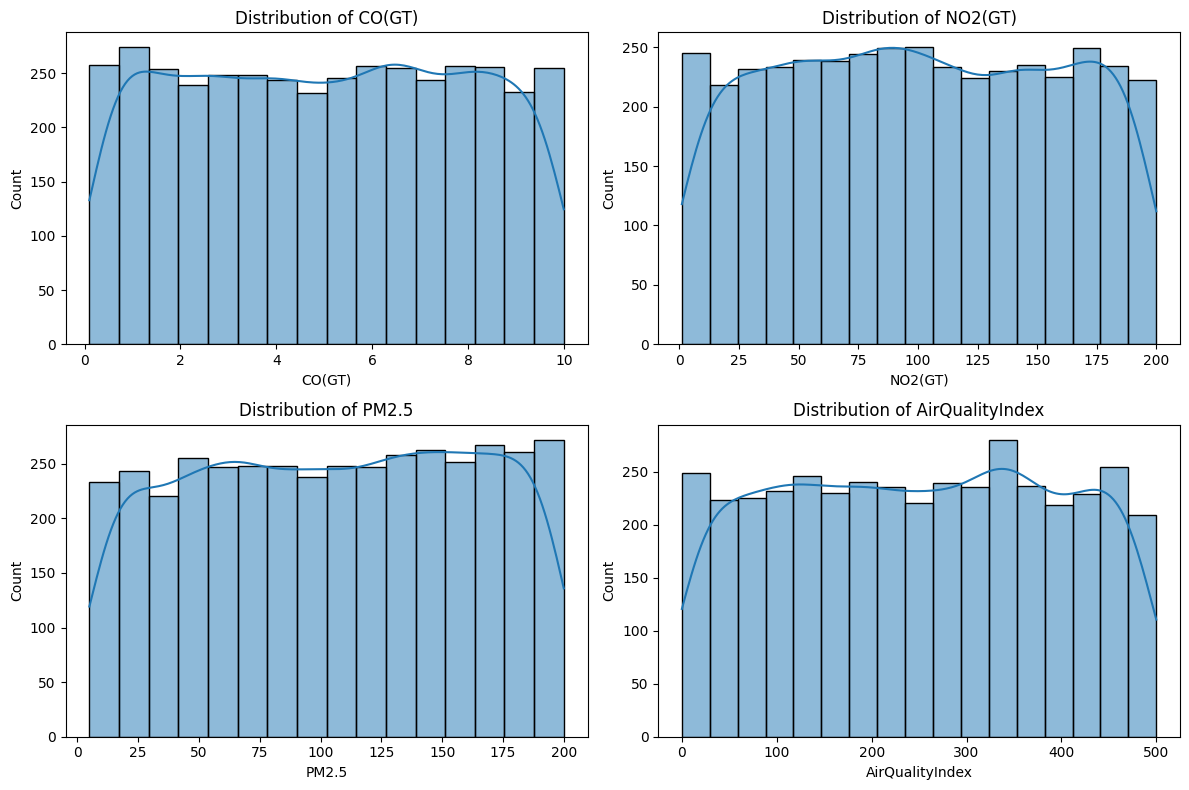

In [70]:
# Visualize distributions of key features
plt.figure(figsize=(12, 8))
for i, col in enumerate(['CO(GT)', 'NO2(GT)', 'PM2.5', 'AirQualityIndex']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**(b) Correlation Heat Map**

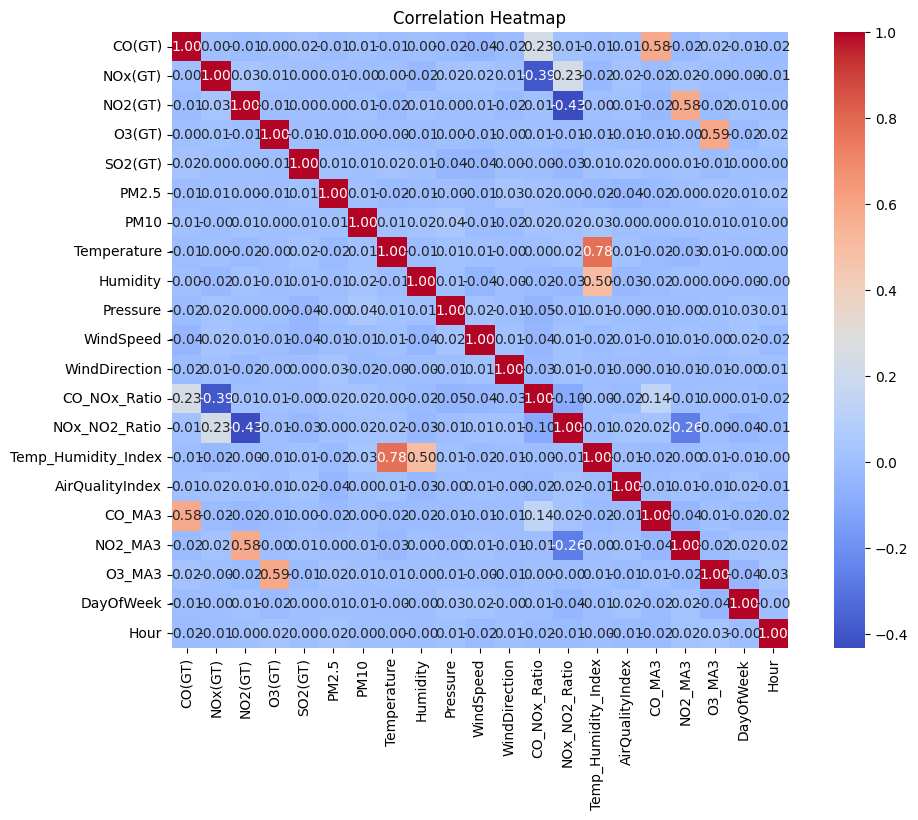

In [71]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


**(c) Scatter Plot: PM2.5 vs AirQualityIndex**

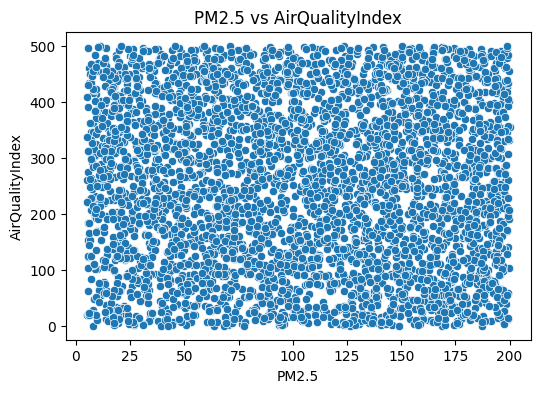

In [72]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'PM2.5', y = 'AirQualityIndex', data=df)
plt.title('PM2.5 vs AirQualityIndex')
plt.show()

**(d) Pair plot for selected numeric variables to see pairwise relationships**

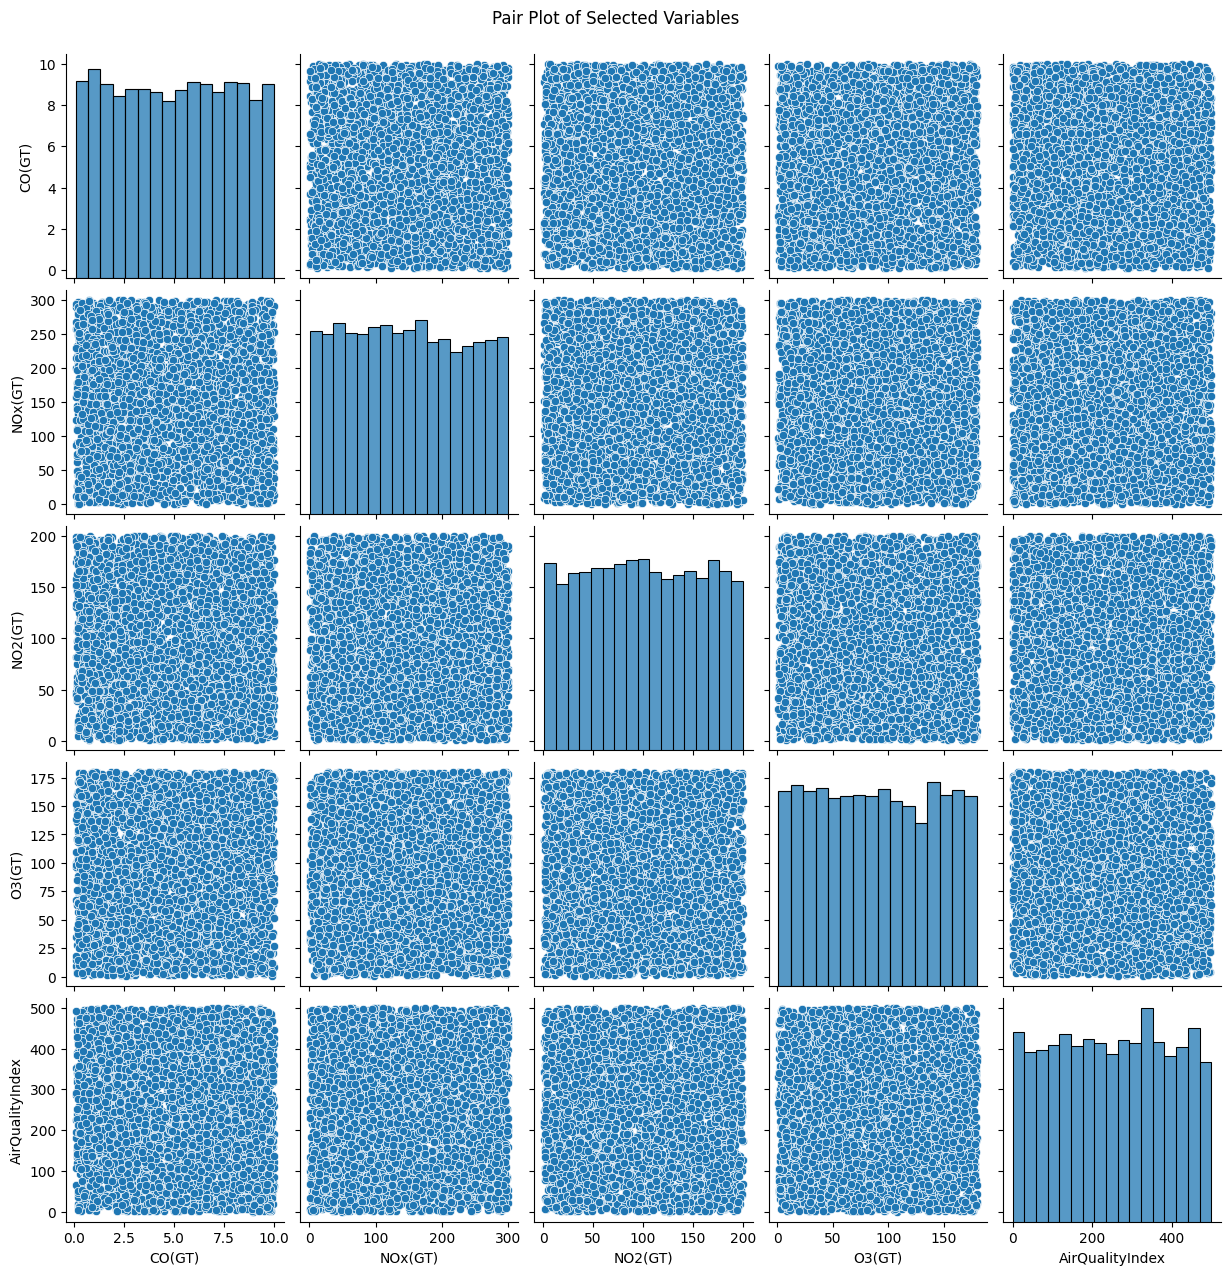

In [73]:
selected_columns = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'AirQualityIndex']
available_columns = [col for col in selected_columns if col in df.columns]
if len(available_columns) >= 2:
    sns.pairplot(df[available_columns])
    plt.suptitle('Pair Plot of Selected Variables', y=1.02)
    plt.show()

**(e) Box plot for AirQualityIndex**


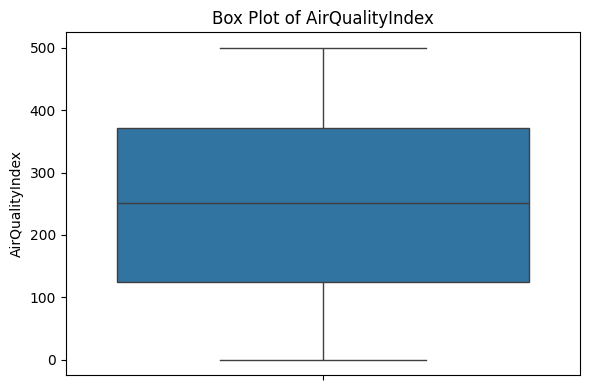

In [74]:
if 'AirQualityIndex' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df['AirQualityIndex'])
    plt.title('Box Plot of AirQualityIndex')
    plt.tight_layout()
    plt.show()

**(f) Count plot (acting as a pie chart alternative) for DayOfWeek if it exists**

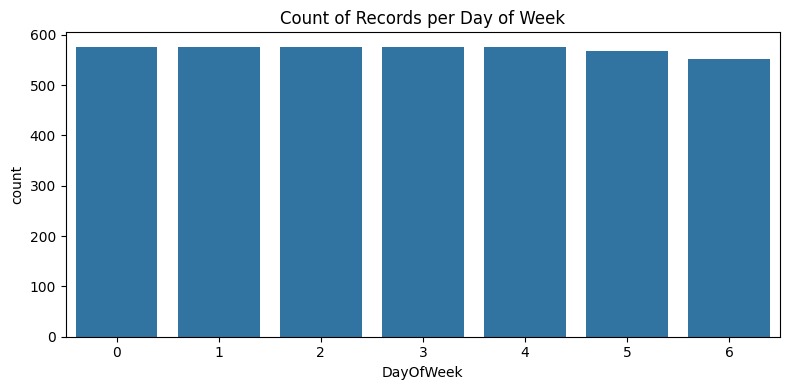

In [75]:
if 'DayOfWeek' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='DayOfWeek', data=df)
    plt.title('Count of Records per Day of Week')
    plt.tight_layout()
    plt.show()

## **4. Statistical Analysis**

In [76]:
# Correlation with AirQualityIndex
corr = numeric_df.corr()['AirQualityIndex'].sort_values(ascending=False)
print("Correlation with AirQualityIndex:\n", corr)
print("\n\n")
# Group by DayOfWeek
print(df.groupby('DayOfWeek')['AirQualityIndex'].mean())

Correlation with AirQualityIndex:
 AirQualityIndex        1.000000
SO2(GT)                0.024626
NOx(GT)                0.020691
DayOfWeek              0.019484
NOx_NO2_Ratio          0.018962
Temperature            0.014175
NO2_MA3                0.013948
NO2(GT)                0.011104
CO(GT)                 0.005958
WindSpeed              0.005551
PM10                   0.000862
Pressure              -0.003967
WindDirection         -0.004324
O3(GT)                -0.009054
CO_MA3                -0.009203
Temp_Humidity_Index   -0.011309
O3_MA3                -0.012889
Hour                  -0.014327
CO_NOx_Ratio          -0.019032
Humidity              -0.028728
PM2.5                 -0.037478
Name: AirQualityIndex, dtype: float64



DayOfWeek
0    241.227245
1    244.613793
2    257.835291
3    249.243633
4    253.797514
5    245.799569
6    254.866663
Name: AirQualityIndex, dtype: float64


## **5. Feature Selection and Preprocessing**

In [77]:
# Select features and target
features = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'O3(GT)', 'SO2(GT)', 'PM2.5', 'PM10', 'Temperature', 'Humidity', 'Pressure', 'WindSpeed']
X = df[features]
y = df['AirQualityIndex']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **6. Machine Learning Models**

**(a) Linear Regression**

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

**(b) Decision Tree**

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

**(c) Random Forest**

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


**(d) K-Nearest Neighbour**

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# **7. Model Evaluation**

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_knn, "KNN")



Linear Regression Performance:
R2 Score: -0.004745277886126331
MAE: 124.78362584424615
MSE: 20861.7965598557
RMSE: 144.43613315183876

Decision Tree Performance:
R2 Score: -1.0030764298423036
MAE: 166.46348757996915
MSE: 41590.41489712605
RMSE: 203.9372817734071

Random Forest Performance:
R2 Score: -0.030811180125308146
MAE: 125.61985122087758
MSE: 21403.009901815316
RMSE: 146.29767565417885

KNN Performance:
R2 Score: -0.2176549315561882
MAE: 133.76804996985564
MSE: 25282.496988365267
RMSE: 159.00470744089708


## **Feature Importance and Evaluation**

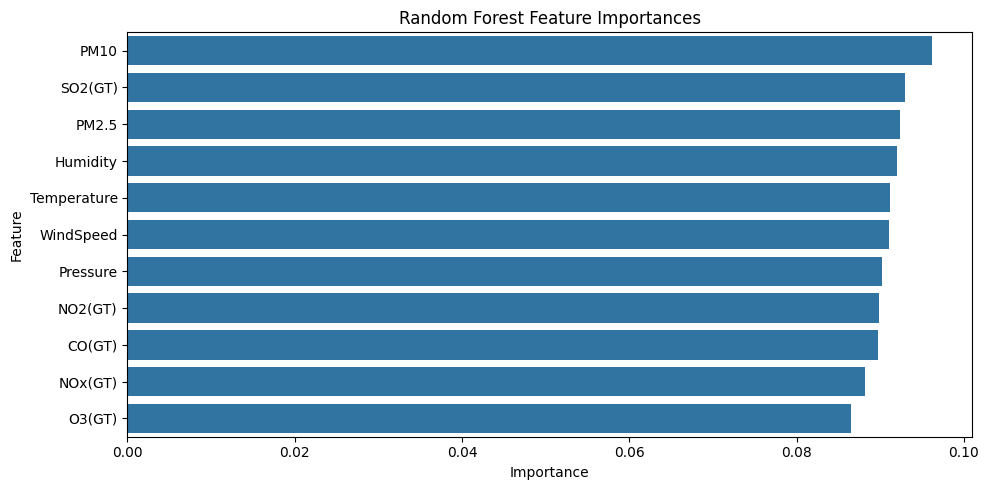

In [83]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=feature_names)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## **Logistic Regression(Classification)**

In [84]:
# Example: Categorize AQI into 3 classes
bins = [0, 100, 200, np.inf]
labels = ['Good', 'Moderate', 'Unhealthy']
df['AQI_Category'] = pd.cut(df['AirQualityIndex'], bins=bins, labels=labels)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AQI_Category_Code'] = le.fit_transform(df['AQI_Category'])

# Features and target for classification
X_cls = df[features]
y_cls = df['AQI_Category_Code']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


## **Model Training and Evaluation**

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_cls, y_train_cls)
y_pred_logreg = logreg.predict(X_test_cls)

# Evaluation
print(classification_report(y_test_cls, y_pred_logreg, target_names=le.classes_))


              precision    recall  f1-score   support

        Good       0.00      0.00      0.00       156
    Moderate       0.00      0.00      0.00       155
   Unhealthy       0.61      1.00      0.76       489

    accuracy                           0.61       800
   macro avg       0.20      0.33      0.25       800
weighted avg       0.37      0.61      0.46       800



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

## **Confusion Matrix Visualization**

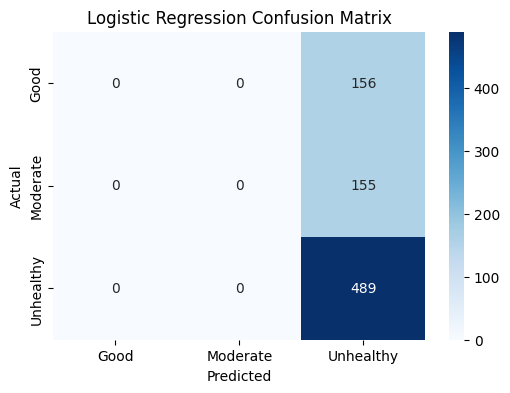

In [86]:
cm = confusion_matrix(y_test_cls, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


##> **Why Is This Project Important?**
* Public Health : Poor air quality is linked to respiratory and cardiovascular diseases. Predicting AQI can help issue warnings and prevent health crises.

* Environmental Policy : Insights from the data can inform policymakers about which pollutants to target.

* Machine Learning Practice : This project covers the full data science workflow, making it a great portfolio piece.


##> **What Makes This Project Impressive?**
* End-to-End Workflow: From raw data to actionable insights and predictive modeling.

* Multiple ML Algorithms: Demonstrates your ability to compare and interpret different approaches.

* Visualization & Communication: Shows you can not only build models but also explain results visually and statistically.

* Real-World Impact: Air quality is a pressing, relatable issue.

